
#Task1: Apply filter on input image

Gaussian Filter

Neighbourhood Average Filter

Median Filter

Laplacian Filter

BOX Filter

Weighted-average filter

Minimum filter

Maximum filter

Gaussian Blur

Edge Detection

Sobel Filter

Canny Edge Detector

Robinson Compass Masks

Krisch Compass Masks


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

PATHS = {
    "Gradient": "/content/Gradient.png",
    "Car": "/content/car.png",
    "Car_resize": "/content/car_resize.png"
}

def read_gray(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image not found/readable: {path}")
    return img

def show_grid(images, titles, ncols=4, figsize=(18,10)):
    n = len(images)
    nrows = int(np.ceil(n / ncols))
    plt.figure(figsize=figsize)
    for i, (im, t) in enumerate(zip(images, titles), 1):
        plt.subplot(nrows, ncols, i)
        plt.imshow(im, cmap="gray")
        plt.title(t, fontsize=10)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

def normalize_0_255(x):
    x = x.astype(np.float32)
    x = x - x.min()
    den = (x.max() + 1e-9)
    x = (x / den) * 255.0
    return x.astype(np.uint8)

In [7]:
#filters
def gaussian_filter(img, k=5, sigma=1.0):
    return cv2.GaussianBlur(img, (k, k), sigmaX=sigma)

def neighbourhood_average(img, k=5):
    return cv2.blur(img, (k, k))

def median_filter(img, k=3):
    return cv2.medianBlur(img, k)

def box_filter(img, k=5):
    return cv2.boxFilter(img, ddepth=-1, ksize=(k, k), normalize=True)

def weighted_average_filter(img): #practically Gaussian is the standard weighted average
    return gaussian_filter(img, k=5, sigma=1.0)

def min_filter(img, k=3):
    kernel = np.ones((k, k), np.uint8)
    return cv2.erode(img, kernel)

def max_filter(img, k=3):
    kernel = np.ones((k, k), np.uint8)
    return cv2.dilate(img, kernel)

def laplacian_filter(img, ksize=3):
    smooth = gaussian_filter(img, k=3, sigma=0.8) #light pre-smoothing helps reduce noise amplification
    lap = cv2.Laplacian(smooth, cv2.CV_64F, ksize=ksize)
    lap = np.abs(lap)
    return normalize_0_255(lap)

def sobel_filter(img, ksize=3):
    gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=ksize)
    gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=ksize)
    mag = np.sqrt(gx*gx + gy*gy)
    return normalize_0_255(mag)

def canny_auto(img, sigma=0.33):    #excellent robust heuristic for thresholds
    m = np.median(img)
    low  = int(max(0, (1.0 - sigma) * m))
    high = int(min(255, (1.0 + sigma) * m))
    edges = cv2.Canny(img, low, high)
    return edges, low, high

In [8]:
#"Edge Detection" generic output for clean & suitable
def edge_detection(img):
    return sobel_filter(img, ksize=3)


Results for Gradient


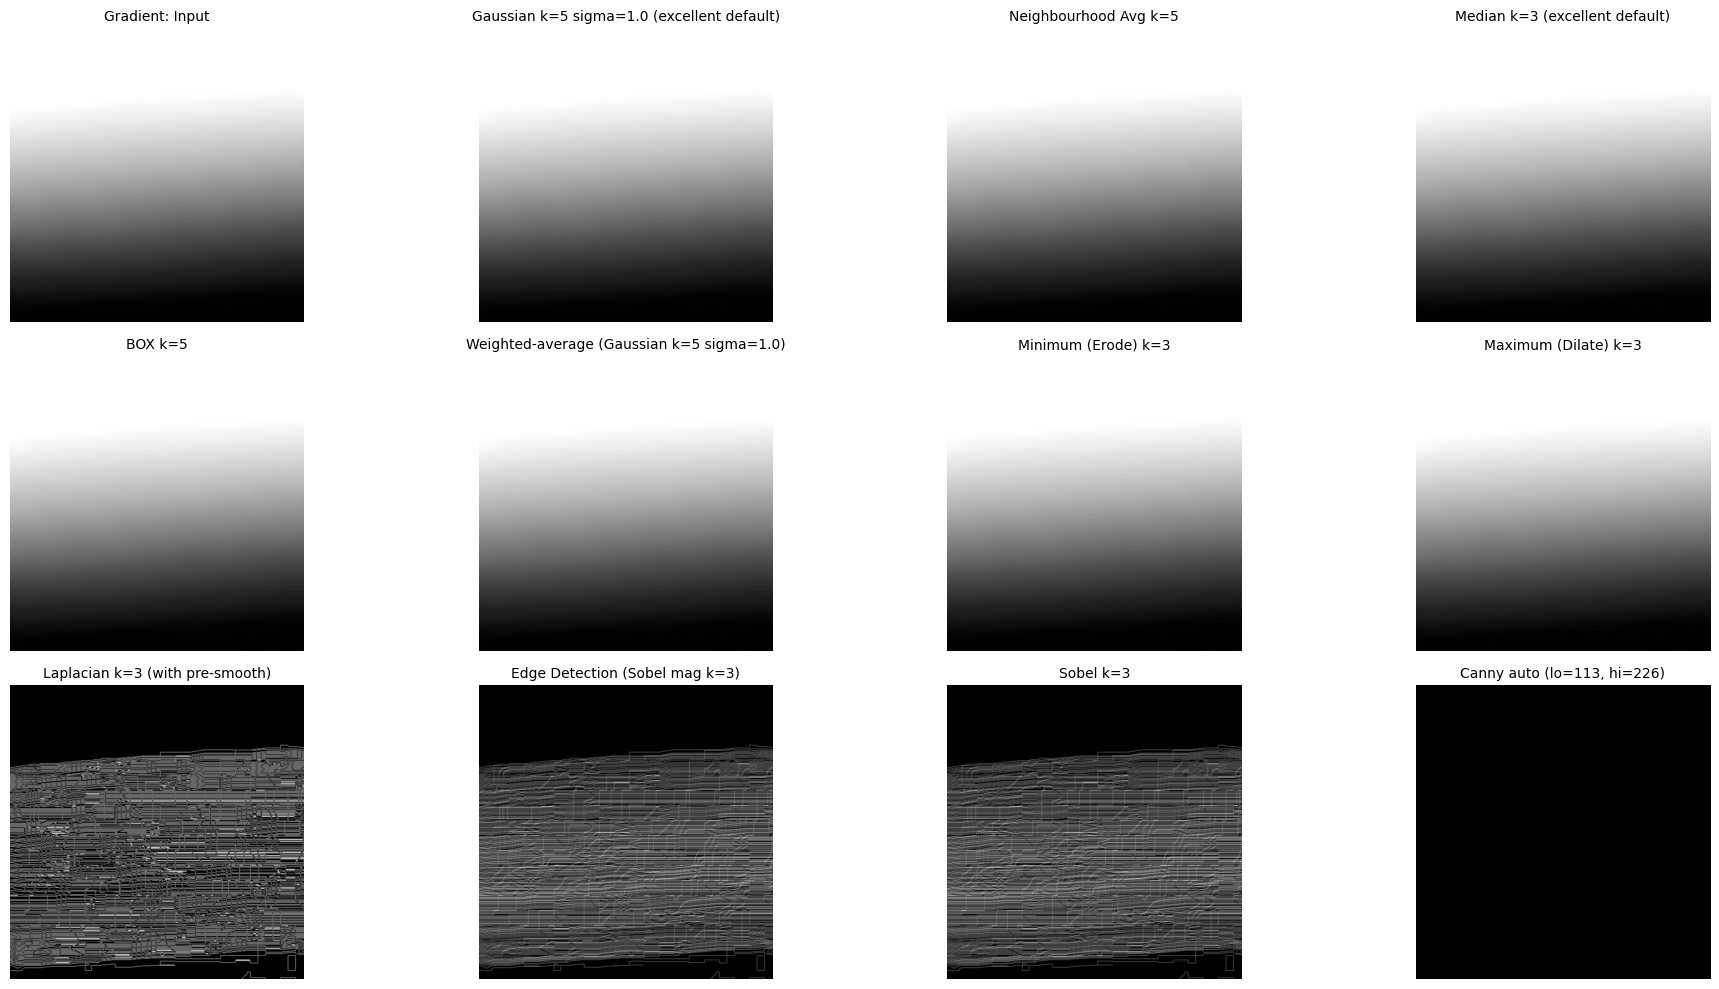


Results for Car


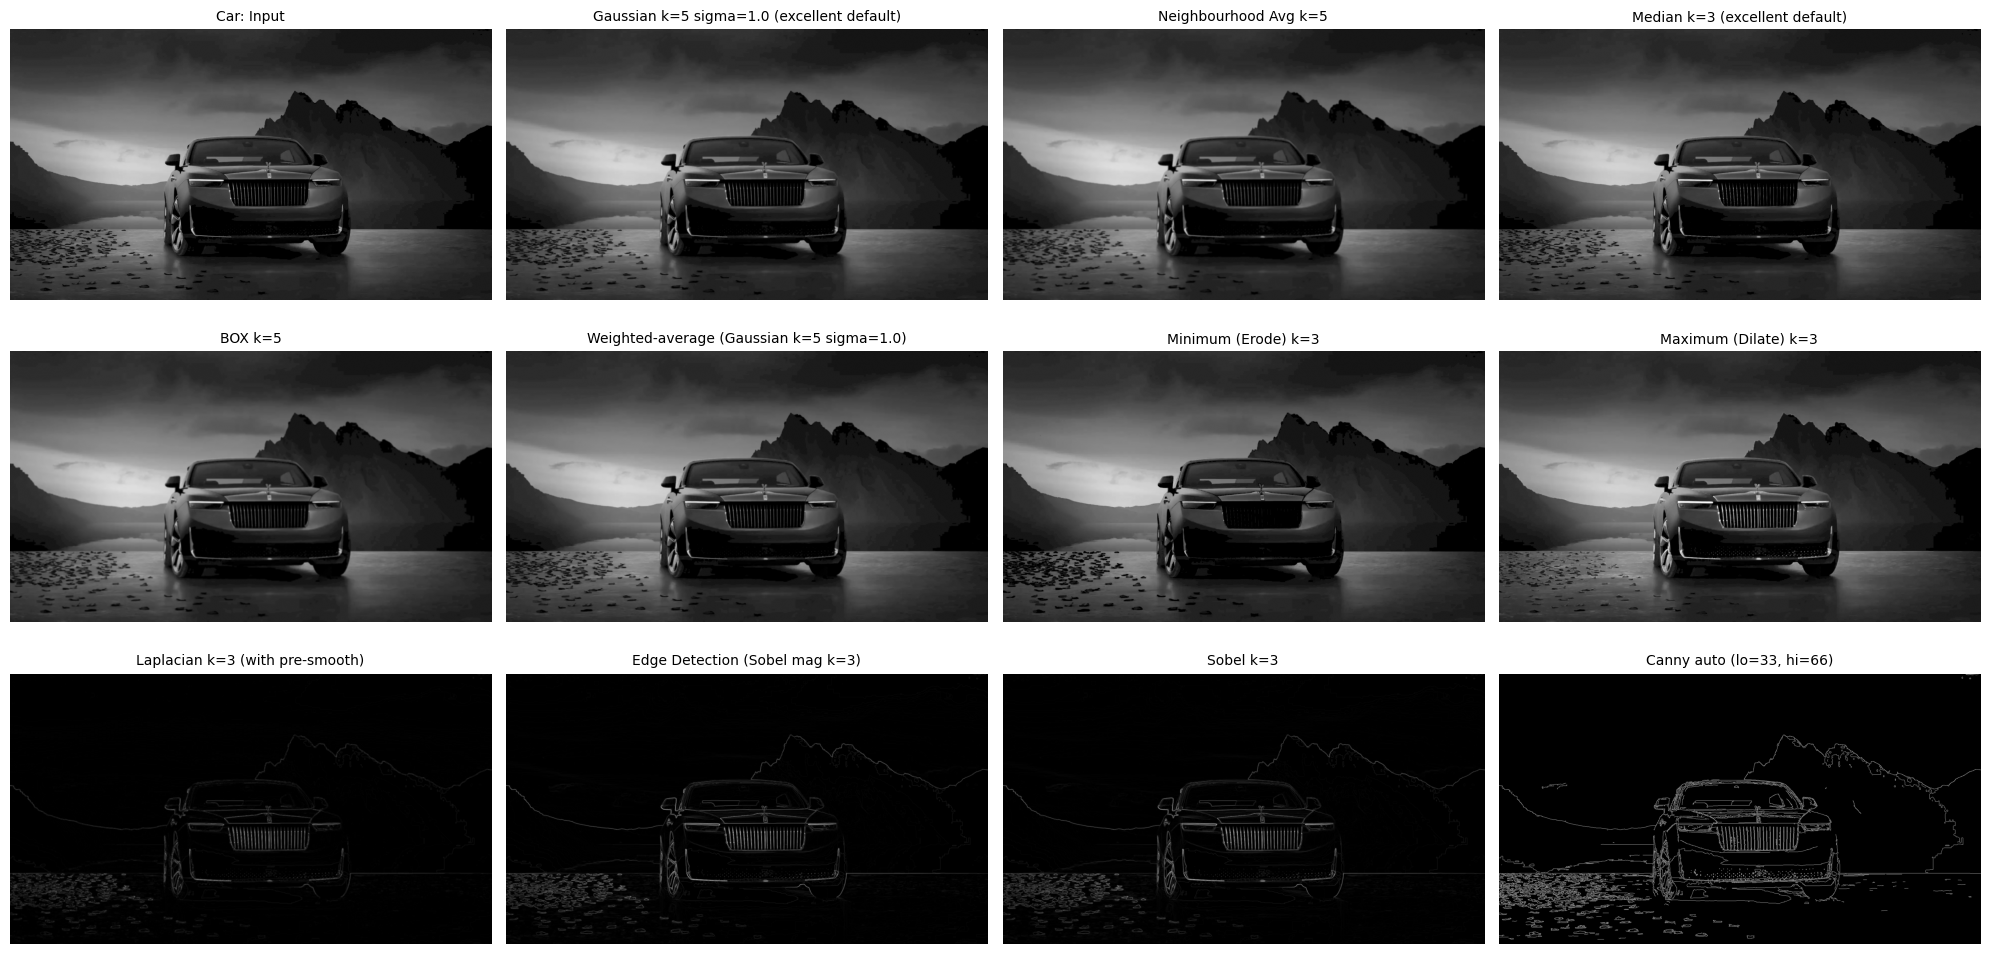


Results for Car_resize


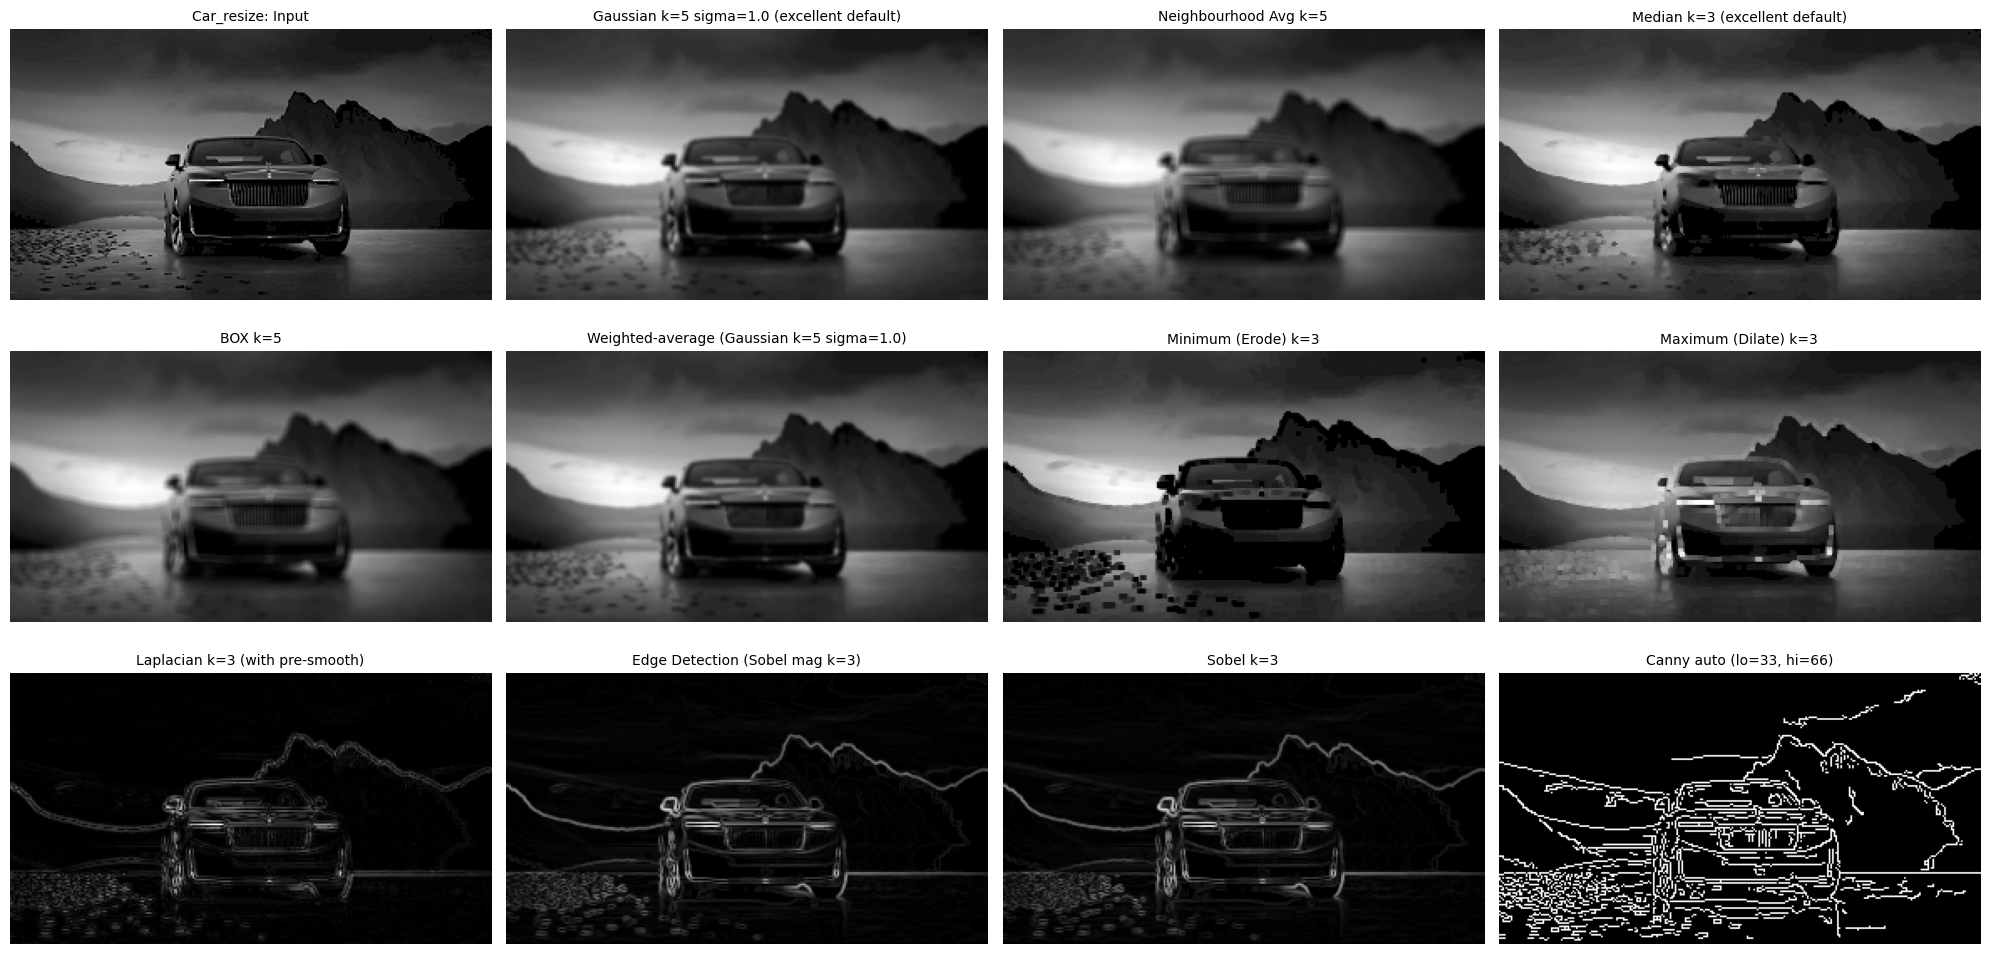

In [9]:
#run all images
for name, path in PATHS.items():
    img = read_gray(path)

    outs, titles = [], []

    outs.append(img); titles.append(f"{name}: Input")

    #smooth or denoise
    outs.append(gaussian_filter(img, k=5, sigma=1.0)); titles.append("Gaussian k=5 sigma=1.0 (excellent default)")
    outs.append(neighbourhood_average(img, k=5));     titles.append("Neighbourhood Avg k=5")
    outs.append(median_filter(img, k=3));             titles.append("Median k=3 (excellent default)")
    outs.append(box_filter(img, k=5));                titles.append("BOX k=5")
    outs.append(weighted_average_filter(img));        titles.append("Weighted-average (Gaussian k=5 sigma=1.0)")
    outs.append(min_filter(img, k=3));                titles.append("Minimum (Erode) k=3")
    outs.append(max_filter(img, k=3));                titles.append("Maximum (Dilate) k=3")

    #edge or derivative
    outs.append(laplacian_filter(img, ksize=3));       titles.append("Laplacian k=3 (with pre-smooth)")
    outs.append(edge_detection(img));                  titles.append("Edge Detection (Sobel mag k=3)")
    outs.append(sobel_filter(img, ksize=3));           titles.append("Sobel k=3")
    canny, lo, hi = canny_auto(img, sigma=0.33)
    outs.append(canny); titles.append(f"Canny auto (lo={lo}, hi={hi})")

    #display
    print(f"\nResults for {name}")
    show_grid(outs, titles, ncols=4, figsize=(20, 10))
